In [10]:
import os
import cv2
import numpy as np
import Augmentor
from matplotlib import pyplot as plt
from seaborn import heatmap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import L2

from os import listdir
from  os.path import join

In [11]:
# GLOBAL VARIABLES
preprocessingPath="preprocessingData"
path = "data"
classes = listdir(preprocessingPath)
trainPath = join(path,"train")
valPath = join(path,"val")
train = 0.80 # ;val = 1. - train
np.random.seed(26)


batch_size = 32
epochs = 256
lr = 1e-4
input_shape = (224,224)
channels = (1,)
class_mode = 'categorical'
color_mode = 'grayscale'
num_class = len(classes)

In [12]:
# Create an SVM classifier
clf = svm.SVC(C=1,
                kernel='rbf', 
                )

In [13]:
train_generator = ImageDataGenerator(rescale=1./255,
                                    #  width_shift_range = 0.2,
                                    #  height_shift_range = 0.2, 
                                    #  zoom_range = 0.2,
                                     horizontal_flip = True,
                                     vertical_flip = True,
                                     rotation_range = 45,
                                     ).flow_from_directory(directory = trainPath,
                                                                         target_size=input_shape,
                                                                         color_mode=color_mode,
                                                                         class_mode=class_mode,
                                                                         batch_size=batch_size,
                                                                         )

val_generator = ImageDataGenerator(rescale=1./255,).flow_from_directory(directory = valPath,
                                                                         target_size=input_shape,
                                                                         color_mode=color_mode,
                                                                         class_mode=class_mode,
                                                                         batch_size=batch_size,
                                                                         )

Found 837 images belonging to 4 classes.
Found 210 images belonging to 4 classes.


In [14]:
model = Sequential()
model.add(Input(input_shape+channels))
model.add(Flatten())
model.add(Dense(units=512, activation='relu', kernel_regularizer=L2()))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=512, activation='relu', kernel_regularizer=L2()))
model.add(Dropout(0.5))
# model.add(Dense(units=128, activation='relu'))
# model.add(Dense(units=num_class, activation='softmax'))
model.add(clf)



TypeError: The added layer must be an instance of class Layer. Received: layer=SVC(C=1) of type <class 'sklearn.svm._classes.SVC'>.

Text(0.5, 0.98, 'Confusion Matrix Evaluation')

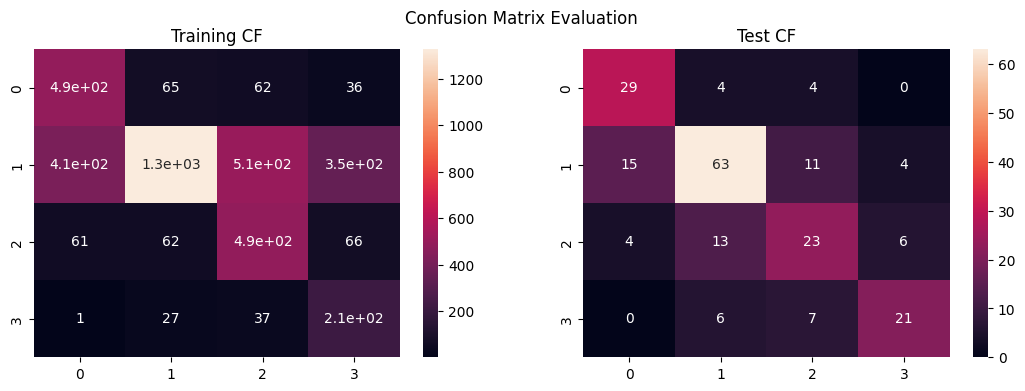

In [ ]:
## Confusion Matrix
fig, ax = plt.subplots(1,2, figsize = (13,4))

train_cf = confusion_matrix(train_pred, y_train)
heatmap(train_cf, annot=True, ax=ax[0])
ax[0].set_title("Training CF")

test_cf = confusion_matrix(test_pred, y_test)
heatmap(test_cf, annot=True, ax=ax[1])
ax[1].set_title("Test CF")

fig.suptitle("Confusion Matrix Evaluation")